# Plotly Scatter

### Introduction

In this lesson, we'll move through styling our Scatter plots.

### Economist data

In [12]:
import pandas as pd
url = "https://raw.githubusercontent.com/analytics-engineering-jigsaw/data-visualization/main/5-plotly-styling/economist_tv.csv"
df_drama = pd.read_csv(url, index_col = 0)

In [13]:
df_drama[:2]

,titleId,seasonNumber,title,date,av_rating,share,genres
0,tt2879552,1,11.22.63,2016-03-10,8.4890,0.51,"Drama,Mystery,Sci-Fi"
1,tt3148266,1,12 Monkeys,2015-02-27,8.3407,0.46,"Adventure,Drama,Mystery"


The data loaded above consists of various drama shows from 1990 to 2016 -- and has the tv show name, the season of the tv show, and the average imdb rating.  The `share` column is to indicate the percentage of ratings the show received for that year.

For example, above we can see that 12 monkeys received .46 percent of imdb ratings in 2015.

Let's work towards developing the following chart.

<img src="./movie-ratings.png">

The chart above plot consists of the line chart and a scatter chart.

1. Line chart 
* The line chart plots the average annual tv show rating from 1990 to 2016.
2. Scatter plot
* You can make a scatter plot just like a line chart, just set the x and y values and the mode to `markers`
    * For example, `go.Scatter(x = , y = mode = 'markers')`
* The scatter plot only shows a sample of the tv shows to avoid cluttering 
    * `sampled_dramas = df_drama.sample(500, random_state = 2)`
        * The random_state = 2, means that we will choose the same "random" sample each time.
* The scatter plot shows the rating of each tv show, and the release date as the x values. 
* In the scatter plot, there's a `marker` attribute that takes a dictionary of keys color and size
    *  `go.Scatter(marker = {'color': , 'size': })`
    * Set the size equal to 1.5 times the share size, and the color to `LightSkyBlue`
3. Figure
    * Notice that the overall figure has a y axis range from 7 to 9.5
    * We used a seethrough background color

### Solution

* For the line chart, we need to get the average rating per year.  And to do that we need to create a new column for year, and then group by the year column.
* So we convert the date to a datetime, and calculate the year.  Then we group by the year and select the average rating.

In [30]:
df_drama_dated = df_drama.assign(date = pd.to_datetime(df_drama['date']))
year = df_drama_dated['date'].dt.year
df_drama_year = df_drama_dated.assign(year = year)

year_rating = df_drama_year.groupby('year').median(numeric_only = True)['av_rating']

For the scatter plot, we sample 500 of the tv shows, and then select the relevant attributes.

In [33]:
sampled_dramas = df_drama.sample(500, random_state = 2)
share = sampled_dramas['share']
drama_dates = sampled_dramas['date']
drama_avg_rating = sampled_dramas['av_rating']
titles = sampled_dramas['title']


* From there, we can build our plot with the following.

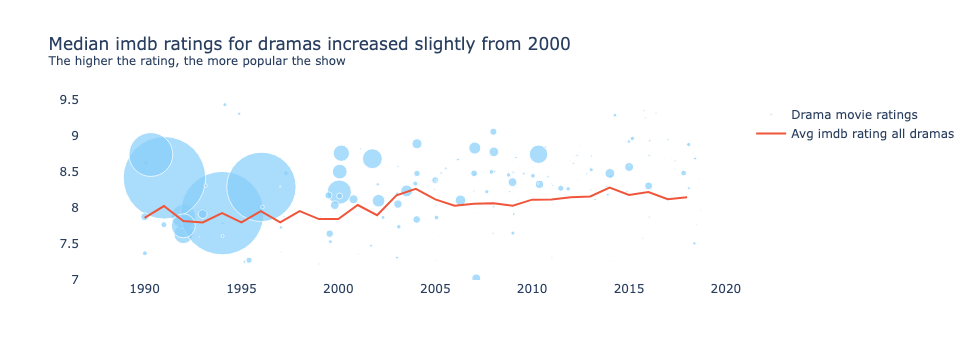

In [28]:
import plotly.graph_objects as go

title = '<span>Median imdb ratings for dramas increased slightly from 2000 <br><sup>The higher the rating, the more popular the show</sup></span>'

layout = go.Layout(yaxis = {'range': [7, 9.5]}, 
                   xaxis = {'showticklabels': True},
                   plot_bgcolor='rgba(0,0,0,0)',
                   title = title)

drama_scatter = go.Scatter(x = drama_dates, y = drama_avg_rating,
                           mode = 'markers', text = titles, name = 'Drama movie ratings', 
                           marker=dict(color='LightSkyBlue', size=share*1.5))

avg_plot = go.Scatter(x = year_rating.index, y = year_rating.values, name = 'Avg imdb rating all dramas')

go.Figure(data = [drama_scatter, avg_plot], layout = layout)

### Initial Scatter plots

[Beautiful Scatter](https://towardsdatascience.com/a-quick-guide-to-beautiful-scatter-plots-in-python-75625ae67396)